# Sentiment Analysis

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali wong
bill,"Original air date: October 10, 2020 Host Bill ...",Bill burr
chris,♪ I hate my brain ♪\n♪ Because the things I th...,Chris gethard
eric,Opening Sketch [dramatic music playing] [stree...,Eric andre
hannah,The following is the transcript of Hannah Gadb...,Hannah gadsby
joe,"[Emcee] Ladies and gentlemen, Joe List. [audie...",Joe list
kavin,"Ladies and gentlemen, welcome to Kavin Jay: Ev...",Kavin jay
larry,"[Announcer] Ladies and gentlemen, Larry, The C...",Larry
nate,[folk rock music playing] ♪ Family ♪\n♪ Singin...,Nate bargatze
rob,"[Rob Schneider] Ladies and gentlemen, please w...",Rob schneider


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali wong,0.073176,0.488676
bill,"Original air date: October 10, 2020 Host Bill ...",Bill burr,0.112312,0.438854
chris,♪ I hate my brain ♪\n♪ Because the things I th...,Chris gethard,0.108538,0.490760
eric,Opening Sketch [dramatic music playing] [stree...,Eric andre,0.025655,0.501003
hannah,The following is the transcript of Hannah Gadb...,Hannah gadsby,0.067130,0.548747
joe,"[Emcee] Ladies and gentlemen, Joe List. [audie...",Joe list,0.060480,0.516670
kavin,"Ladies and gentlemen, welcome to Kavin Jay: Ev...",Kavin jay,0.159042,0.520801
larry,"[Announcer] Ladies and gentlemen, Larry, The C...",Larry,0.082669,0.510432
nate,[folk rock music playing] ♪ Family ♪\n♪ Singin...,Nate bargatze,0.091899,0.476238
rob,"[Rob Schneider] Ladies and gentlemen, please w...",Rob schneider,0.058878,0.544106


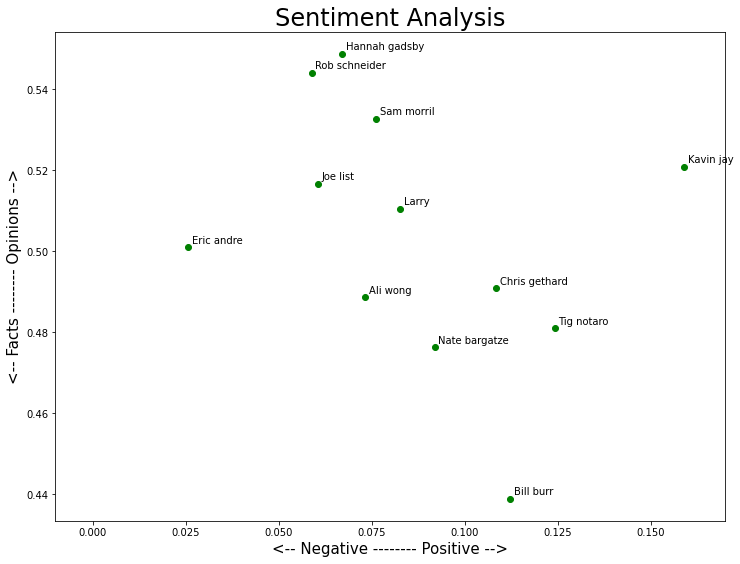

In [6]:
# Plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 9]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='green')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .17) 
    
plt.title('Sentiment Analysis', fontsize=24)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [7]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [8]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali wong,0.073176,0.488676
bill,"Original air date: October 10, 2020 Host Bill ...",Bill burr,0.112312,0.438854
chris,♪ I hate my brain ♪\n♪ Because the things I th...,Chris gethard,0.108538,0.490760
eric,Opening Sketch [dramatic music playing] [stree...,Eric andre,0.025655,0.501003
hannah,The following is the transcript of Hannah Gadb...,Hannah gadsby,0.067130,0.548747
joe,"[Emcee] Ladies and gentlemen, Joe List. [audie...",Joe list,0.060480,0.516670
kavin,"Ladies and gentlemen, welcome to Kavin Jay: Ev...",Kavin jay,0.159042,0.520801
larry,"[Announcer] Ladies and gentlemen, Larry, The C...",Larry,0.082669,0.510432
nate,[folk rock music playing] ♪ Family ♪\n♪ Singin...,Nate bargatze,0.091899,0.476238
rob,"[Rob Schneider] Ladies and gentlemen, please w...",Rob schneider,0.058878,0.544106


In [9]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage Ali Wong! ♪ What y’all thought Y’all wasn’t gon’ see me? ♪\n♪ I’m the Osirus of this shit♪\n♪ Wu-Tang is here forever, motherfuckers♪\n♪ It’s like this ninety-seven ♪\n♪ Aight my n i g g a s and my n i g g arettes♪\n♪ Let’s do it like this♪\n♪ I’ma rub your ass in the moonshine♪\n♪ Let’s take it back to seventy-nine♪\n♪ I bomb atomically♪\n♪ Socrates’ philosophies and hypotheses♪\n♪ Can’t define How I be droppin’ these mockeries♪\n♪ Lyrically perform armed robbery ♪\n♪ Flee with the lottery Possibly they spotted me♪\n♪ Battle-scarred shogun♪\n♪ Explosion when my pen hits ♪ Oh, my goodness! I heard a rumor that all of the Asians in this city… Have congregated in this theater tonight. Yeah. Thank you for coming with your white boyfriends. I really… Appreciate it, from the bottom of my heart. I’m so excited to be here. I have not been performing that much at all, in the past two years, because two years ago, I gave birth to a baby girl.

In [10]:
# The list has 10 elements, one for each transcript
len(list_pieces)

12

In [11]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [12]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.11179629629629631,
  0.0643281208587331,
  -0.003135962802629471,
  0.07573907939039516,
  0.06340367965367964,
  0.09299761686125319,
  0.07616132860698076,
  0.1645792748917749,
  0.02223321458235253,
  0.031564707222601976],
 [0.08579545454545454,
  0.2755844155844156,
  0.11988011988011989,
  -0.4166666666666667,
  0.11666666666666667,
  0.03333333333333333,
  0.022039141414141414,
  0.18579545454545454,
  0.33928571428571425,
  0.08472222222222223],
 [0.08434701472295458,
  0.0765822510822511,
  0.0849522005772006,
  0.1807988174725463,
  0.14750701110483722,
  0.14897853080626194,
  0.06410970418470416,
  0.16922604016354006,
  0.052153293135436006,
  0.06214174418961653],
 [-0.031413035339922145,
  0.1624290595867977,
  -0.012066185666185666,
  -0.003036221590909085,
  0.08840552178318135,
  -0.02195703601953602,
  -0.027736100179282006,
  0.0823087431693989,
  -0.04083830215905687,
  0.07844696969696967],
 [0.14059461574024681,
  0.01918769722341151,
  0.1458347676419966,
 

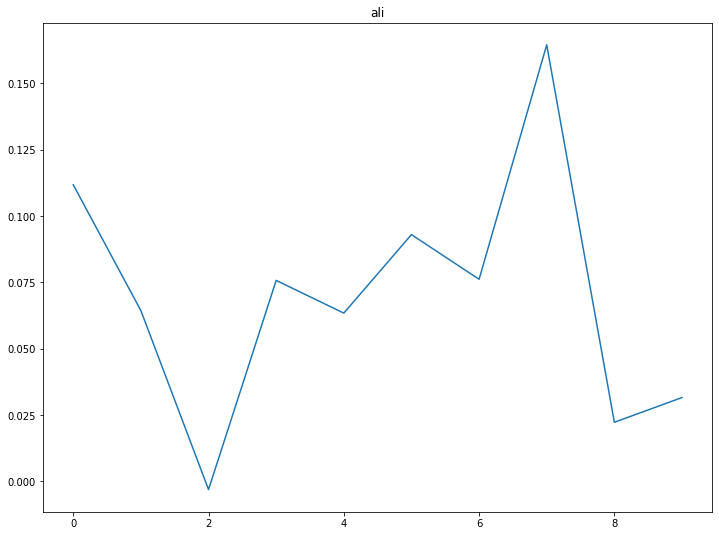

In [13]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

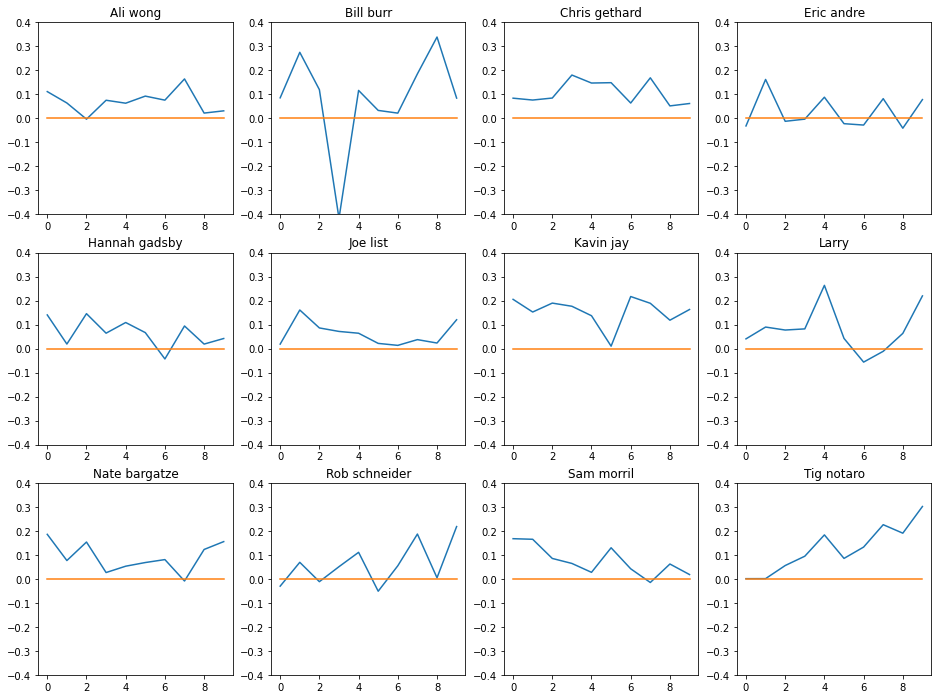

In [24]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.4, ymax=.4)
    
plt.show()

Ali Wong stays generally positive throughout her routine. Similar comedians are Chris gethard and Eric andre, 

Bill burr has the largest emotion move among comdeians

The is a interesting point which is Tig notaro gets happier as time passes, however Sam morril becoming sad as time passes.

For the rest of comedians, they all have emotion's wave in their speech